#  Capstone Project : Retail

### Problem Statement
- It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
- Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
- Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import scipy.stats as stats

In [2]:
# Loading Data set into the jupyter environment.

retail_data = pd.read_excel('Online Retail.xlsx')
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Project Task: Week 1

**Data Cleaning:**

1. Perform a preliminary data inspection and data cleaning.

- a. Check for missing data and formulate an apt strategy to treat them.

- b. Remove duplicate data records.

- c. Perform descriptive analytics on the given data.

In [3]:
retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
retail_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


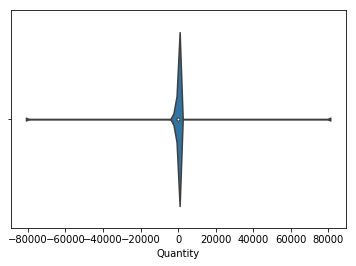

In [6]:
sns.violinplot(retail_data.Quantity);

In [7]:
# Check and Clean Missing Data
retail_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail_data= retail_data.dropna(subset=['CustomerID'])

In [9]:
retail_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# Check & Clean Duplicates Data

retail_data.duplicated().sum()

5225

In [11]:
retail_data = retail_data.drop_duplicates()

In [12]:
retail_data.duplicated().sum()

0

In [13]:
retail_data.shape

(401604, 8)

In [14]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
retail_data=retail_data[(retail_data['Quantity']>0) & (retail_data['UnitPrice']>0)]
retail_data.describe()


,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [16]:
rfm_data = retail_data.copy()
retail_data.shape

(392692, 8)

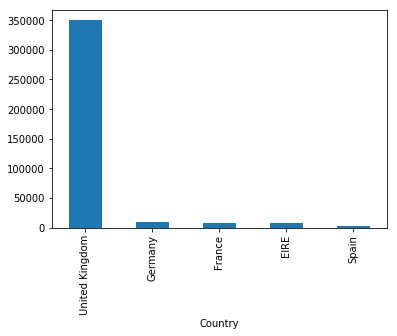

In [17]:
# top 5 Countries with highest buyings.
retail_data.groupby('Country')['Quantity'].count().sort_values(ascending =  False).head().plot.bar();

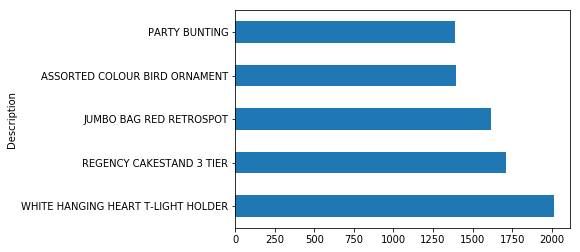

In [18]:
# Top 5 products sold till now.
retail_data.groupby('Description')['Quantity'].count().sort_values(ascending =  False).head().plot.barh();

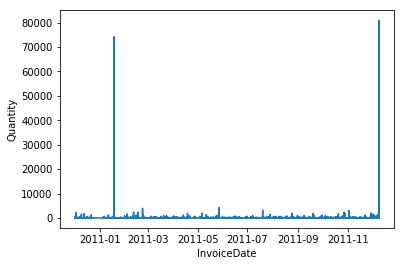

In [19]:
sns.lineplot(x = 'InvoiceDate', y= 'Quantity', data = retail_data);

# Cohort Analysis

In [20]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [21]:
retail_data['InvoiceMonth'] = retail_data['InvoiceDate'].apply(get_month)

In [22]:
grouping = retail_data.groupby('CustomerID')['InvoiceMonth']
retail_data['Cohort_Month'] = grouping.transform('min')

In [23]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [24]:
def get_date(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day
    

In [25]:
invoice_year , invoice_month , _ = get_date(retail_data , 'InvoiceMonth')
cohort_year , cohort_month , _ = get_date(retail_data , 'Cohort_Month')
years_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [26]:
retail_data['CohortIndex'] = years_diff *12 + month_diff +1 
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort_Month,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [27]:
grouping = retail_data.groupby(['Cohort_Month','CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()

In [28]:
cohort_counts = cohort_data.pivot(index = 'Cohort_Month',columns = 'CohortIndex',values = 'CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes , axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


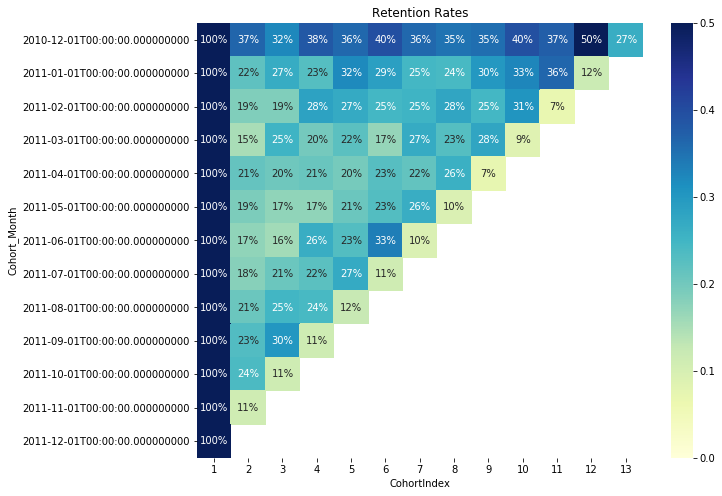

In [30]:
plt.figure(figsize=(10,8))
plt.title('Retention Rates')
sns.heatmap(data = retention,annot= True,fmt = '.0%',vmin = 0,vmax = 0.5,cmap ='YlGnBu' )
plt.show()

### Project Task: Week 2
**Data Modeling :**

-  Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

-  Calculate RFM metrics.

-  Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

-  Combine three ratings to get a RFM segment (as strings).

-  Get the RFM score by adding up the three ratings.

-  Analyze the RFM segments by summarizing them and comment on the findings.

In [31]:
rfm_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
rfm_data.shape

(392692, 8)

In [33]:
rfm_data['TotalSum'] = rfm_data['UnitPrice']* rfm_data['Quantity']

print('Min Invoice Date:',rfm_data.InvoiceDate.dt.date.min(),'max Invoice Date:', rfm_data.InvoiceDate.dt.date.max())


Min Invoice Date: 2010-12-01 max Invoice Date: 2011-12-09


In [34]:
snapshot_date = rfm_data['InvoiceDate'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [35]:
rfm = rfm_data.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days, 'InvoiceNo':'count','TotalSum': 'sum'})

In [36]:
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'},inplace= True)
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [37]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6.0
12347.0,2,182,4310.00,4,4,4,444,12.0
12348.0,75,31,1797.24,2,2,4,224,8.0
12349.0,19,73,1757.55,3,3,4,334,10.0
12350.0,310,17,334.40,1,1,2,112,4.0


In [38]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         260.7       8.2         157.4   381
4.0         177.2      13.6         240.0   388
5.0         152.9      21.2         366.6   518
6.0          95.9      27.9         820.8   457
7.0          79.6      38.0         758.1   463
8.0          64.1      56.0         987.3   454
9.0          45.9      78.7        1795.1   414
10.0         32.4     110.5        2056.4   426
11.0         21.3     186.9        4062.0   387
12.0          7.2     367.8        9285.9   450

In [39]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Gold'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Sliver'
    else:  
        return 'Bronze'


In [40]:
rfm['main_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('main_Segment').agg({'Recency':'mean','Frequency':'mean', 'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                mean      mean          mean count
main_Segment                                      
Bronze         192.2      15.1         266.5  1287
Gold            20.1     225.6        5246.8  1263
Sliver          72.0      49.4        1072.4  1788

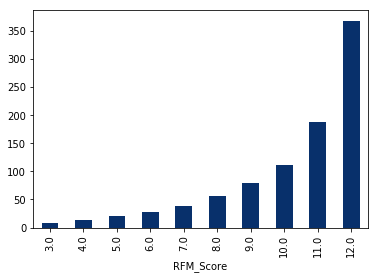

In [41]:
rfm.groupby('RFM_Score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r');


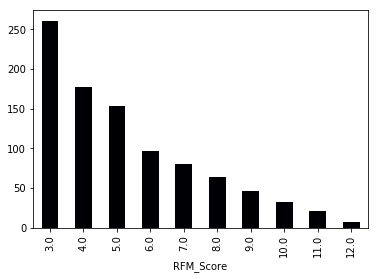

In [42]:
rfm.groupby('RFM_Score')['Recency'].mean().plot(kind='bar', colormap='inferno');

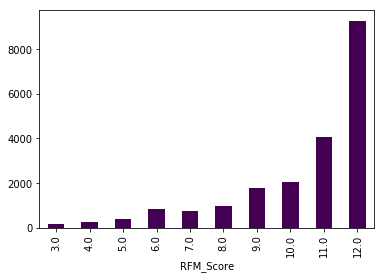

In [43]:
rfm.groupby('RFM_Score')['MonetaryValue'].mean().plot(kind='bar', colormap= 'viridis');

## Project Task: Week 3
**Data Modeling :**

1. Create clusters using k-means clustering algorithm.

   a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

   b. Decide the optimum number of clusters to be formed.

   c. Analyze these clusters and comment on the results.

In [44]:
rfm_clust = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_clust.describe())

           Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     92.536422    90.523744    2048.688081
std     100.014169   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.000000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000


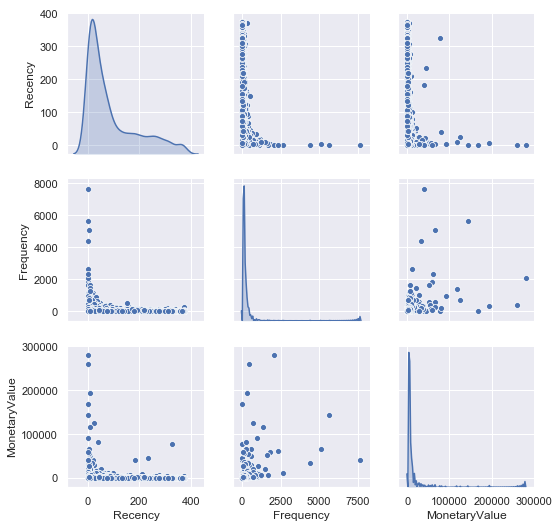

In [45]:
sns.set()
sns.pairplot(rfm_clust ,  palette="husl" , diag_kind="kde");

In [46]:
 rfm_clust_log = np.log(rfm_clust)

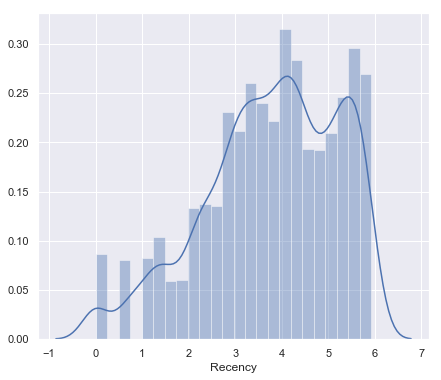

In [47]:
plt.subplots(figsize=(7,6))
sns.distplot(rfm_clust_log.Recency, label = 'Recency')
plt.style.use('fivethirtyeight')

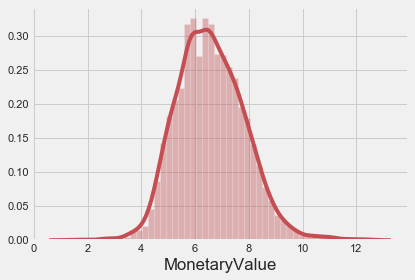

In [48]:
sns.distplot(rfm_clust_log.MonetaryValue, label = 'Monetary Value', color = 'r');

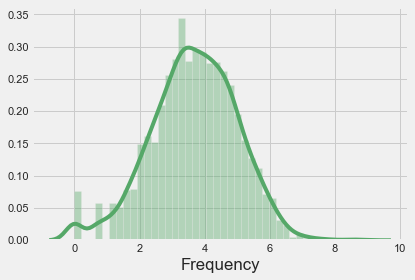

In [49]:
sns.distplot(rfm_clust_log.Frequency, label = 'Frequency', color = 'g');

## Implementation of K-Means Clustering


In [50]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_clust_log)
clust_df = scaler.transform(rfm_clust_log)

In [51]:
pd.DataFrame(clust_df, columns = rfm_clust_log.columns).head()

,Recency,Frequency,MonetaryValue
0,1.409894,-2.779978,3.700201
1,-2.146498,1.160356,1.413256
2,0.383971,-0.179855,0.719951
3,-0.574674,0.468643,0.702251
4,1.374758,-0.634745,-0.612996


In [52]:
# Now we have to choose number of clusters with tthe help pf elbow curve method
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

In [53]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(clust_df)
    inertias.append(kc.inertia_)
    


Text(0.5, 1.0, 'Elbow Diagram')

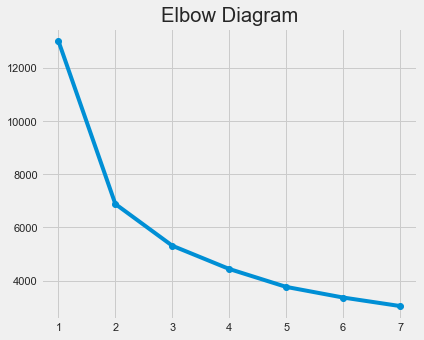

In [54]:
plt.figure(figsize=(6,5))
plt.plot(ks ,inertias  , marker = 'o')
plt.title('Elbow Diagram')

In [55]:
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(clust_df)

cluster_labels = kc.labels_
rfm_clust_k3 = rfm_clust.assign(K_Cluster = cluster_labels)




In [68]:
rfm_clust_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean', 'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           171.0      15.0         293.0  1527
1            13.0     260.0        6574.0   953
2            69.0      65.0        1170.0  1858

# Dashboard

In [74]:
%%html
<img src = "C:/Users/Vimannyu Singh/Desktop/Retail Dashboard.png">